# 1. Principal Component Analysis

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [86]:
df= pd.read_csv(r"CC.csv")

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [65]:
df.shape

(8950, 18)

In [66]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [67]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [68]:
mean1=df['CREDIT_LIMIT'].mean()
mean2=df['MINIMUM_PAYMENTS'].mean()
df['CREDIT_LIMIT'].fillna(value=mean1, inplace=True)
df['MINIMUM_PAYMENTS'].fillna(value=mean2, inplace=True)

In [69]:
df.values

array([['C10001', 40.900749, 0.818182, ..., 139.50978700000002, 0.0, 12],
       ['C10002', 3202.467416, 0.909091, ..., 1072.340217,
        0.22222199999999998, 12],
       ['C10003', 2495.148862, 1.0, ..., 627.284787, 0.0, 12],
       ...,
       ['C19188', 23.398673000000002, 0.833333, ..., 82.418369, 0.25, 6],
       ['C19189', 13.457564000000001, 0.833333, ..., 55.755628, 0.25, 6],
       ['C19190', 372.708075, 0.666667, ..., 88.288956, 0.0, 6]],
      dtype=object)

In [70]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [71]:
del df['CUST_ID']

df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [72]:

X = df.drop('TENURE',axis=1).values
print(X)
y = df['TENURE'].values
print(y)

[[4.09007490e+01 8.18182000e-01 9.54000000e+01 ... 2.01802084e+02
  1.39509787e+02 0.00000000e+00]
 [3.20246742e+03 9.09091000e-01 0.00000000e+00 ... 4.10303260e+03
  1.07234022e+03 2.22222000e-01]
 [2.49514886e+03 1.00000000e+00 7.73170000e+02 ... 6.22066742e+02
  6.27284787e+02 0.00000000e+00]
 ...
 [2.33986730e+01 8.33333000e-01 1.44400000e+02 ... 8.12707750e+01
  8.24183690e+01 2.50000000e-01]
 [1.34575640e+01 8.33333000e-01 0.00000000e+00 ... 5.25499590e+01
  5.57556280e+01 2.50000000e-01]
 [3.72708075e+02 6.66667000e-01 1.09325000e+03 ... 6.31654040e+01
  8.82889560e+01 0.00000000e+00]]
[12 12 12 ...  6  6  6]


In [73]:
%%time

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf.head()

Wall time: 58.4 ms


,principal component 1,principal component 2,TENURE
0,-4326.383979,921.566882,12
1,4118.916665,-2432.846346,12
2,1497.907641,-1997.578694,12
3,1394.548536,-1488.743453,12
4,-3743.351896,757.342657,12


Text(0, 0.5, 'pc2')

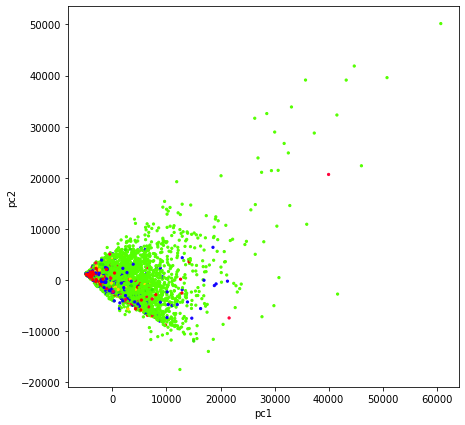

In [74]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=df['TENURE'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

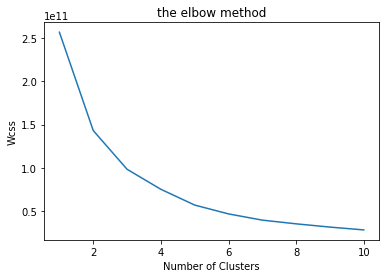

Wall time: 9.27 s


In [75]:
%%time

##elbow method to know the number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finalDf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()


In [76]:
#  Calculate the silhouette score for the above clustering
#since the elbow point is at 3 
nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(finalDf)

y_cluster_kmeans = km.predict(finalDf)
from sklearn import metrics
score = metrics.silhouette_score(finalDf, y_cluster_kmeans)
print(score)


0.572015403462318


Yes Silhouette score improved 

Scalling + PCA + K-Means

In [77]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)

In [78]:
%%time

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf.head()

Wall time: 44.9 ms


,principal component 1,principal component 2,TENURE
0,-1.718890,-1.072934,12
1,-1.169302,2.509332,12
2,0.938413,-0.382604,12
3,-0.907501,0.045864,12
4,-1.637828,-0.684970,12


Text(0, 0.5, 'pc2')

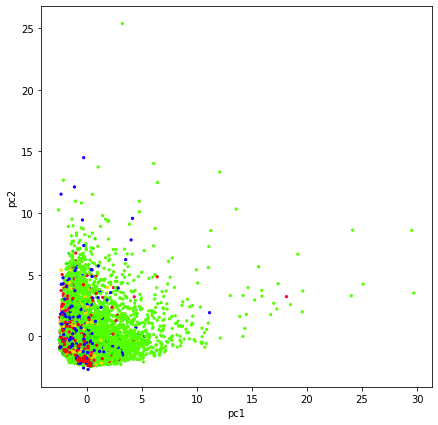

In [79]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=df['TENURE'],cmap='prism', s =5)
plt.xlabel('pc1')

plt.ylabel('pc2')

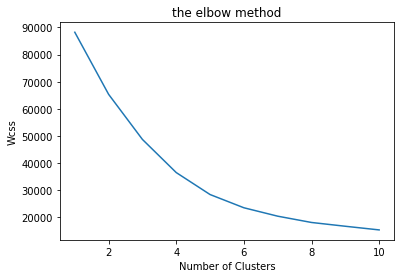

Wall time: 12.5 s


In [80]:
%%time
##elbow method to know the number of clusters


from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finalDf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()


In [81]:
#  Calculate the silhouette score for the above clustering
#since the elbow point is at 3 
nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(finalDf)

y_cluster_kmeans = km.predict(finalDf)
from sklearn import metrics
score = metrics.silhouette_score(finalDf, y_cluster_kmeans)
print(score)


0.38366768475212315
